Денисов Илья, BD-11

Вариант 2:
1. Вывести топ-5 самых опасных улиц для велосипедистов.  
2. Вывести топ-5 факторов, по которым попадают в аварии таксисты. 
3. Вывести медианное и среднее кол-во смертей для каждого из видов  транспортных средств, в случае если оно попало в аварию.  
4. Построить гистограмму причин аварий, а также boxplot для вероятностей попасть в аварию на разных видах транспортных средств. 

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import collections
from pandas import isnull
import sys
import math
%matplotlib inline
import matplotlib.pyplot as plt

/home/ilia/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', sep = ',')
df_origin = df.copy()
pd.set_option('max_columns', 30)

In [54]:
fr = pd.concat([df['ON STREET NAME'],df['NUMBER OF CYCLIST KILLED']*20+df['NUMBER OF CYCLIST INJURED']], axis=1)
gr = fr.groupby('ON STREET NAME')
fr = gr.sum()
top = fr.sort_values(0, ascending=False)
print 'Самые опасные улицы для велосипедистов\n', top[0:5] 


Самые опасные улицы для велосипедистов
                    0
ON STREET NAME       
BROADWAY          412
5 AVENUE          226
BEDFORD AVENUE    190
ROOSEVELT AVENUE  182
3 AVENUE          148


In [5]:
taxi_crash_reasons = new_df[new_df['VEHICLE TYPE CODE']=='TAXI']['CONTRIBUTING FACTOR VEHICLE'].value_counts()
print 'Топ 5 причин аварий такси\n',taxi_crash_reasons[0:5]

Топ 5 причин аварий такси
Unspecified                       34212
Driver Inattention/Distraction     6064
Other Vehicular                    3617
Fatigued/Drowsy                    3070
Turning Improperly                 2281
Name: CONTRIBUTING FACTOR VEHICLE, dtype: int64


In [8]:
#построение упрощенного dataframe с необходимыми данными
columns = [df['CONTRIBUTING FACTOR VEHICLE ' + str(i)] for i in xrange(1,6)]
values = pd.concat(columns).reset_index(drop=True)
new_df = values.to_frame(name = 'CONTRIBUTING FACTOR VEHICLE')
columns = [df['VEHICLE TYPE CODE ' + str(i)] for i in xrange(1,6)]
values = pd.concat(columns).reset_index(drop=True)
new_df = pd.concat([values.to_frame(name='VEHICLE TYPE CODE'), new_df], axis=1)
names = ['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED','NUMBER OF PEDESTRIANS INJURED',\
        'NUMBER OF PEDESTRIANS KILLED','NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED',\
        'NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED']
columns = [df[names] for i in xrange(1,6)]
values = pd.concat(columns).reset_index(drop=True)
#print values
new_df = pd.concat([new_df, pd.DataFrame(values, columns=[names])], axis=1)

In [4]:
cols = ['VEHICLE TYPE CODE', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']
gr = new_df[cols].groupby('VEHICLE TYPE CODE')
print 'Медианное число погибших/пострадавших \n', gr.median()
print 'Среднее чилсо погибших/пострадавших \n', gr.mean()

Медианное число погибших/пострадавших 
                                NUMBER OF MOTORIST INJURED  \
VEHICLE TYPE CODE                                            
AMBULANCE                                                0   
BICYCLE                                                  0   
BUS                                                      0   
FIRE TRUCK                                               0   
LARGE COM VEH(6 OR MORE TIRES)                           0   
LIVERY VEHICLE                                           0   
MOTORCYCLE                                               0   
OTHER                                                    0   
PASSENGER VEHICLE                                        0   
PEDICAB                                                  0   
PICK-UP TRUCK                                            0   
SCOOTER                                                  0   
SMALL COM VEH(4 TIRES)                                   0   
SPORT UTILITY / STATION WAGON  

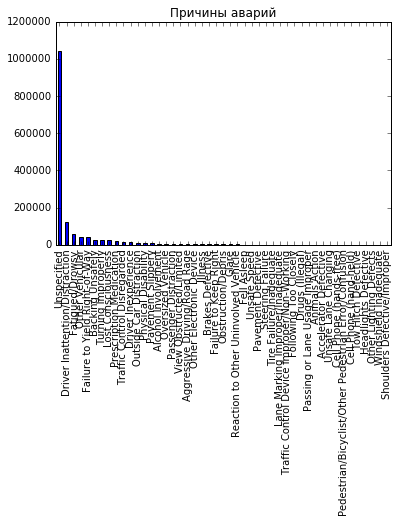

In [56]:
new_df['CONTRIBUTING FACTOR VEHICLE'].value_counts().plot(kind='bar', title=u'Причины аварий')

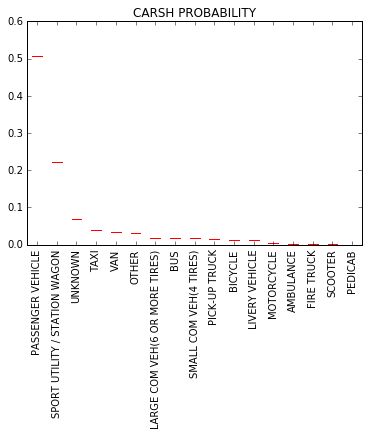

In [7]:
s = new_df['VEHICLE TYPE CODE'].value_counts()
frame = s.to_frame().T.reset_index(drop=True)
frame/=sum(s)
frame.plot(kind='box', rot=90, title = u'Вероятность аварии')
